# Finite Difference Methods

## Laplace's equation
Consider the Laplace's equation given as 
$$
    \nabla^2 u = 0,\quad\quad (x,y) \in D,
$$
where $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$, and the boundary conditions are given as
![Boundary Conditions](img/BCs.png)

## Finite Difference Approximation
Here, we use a rectangular grid $(x_i,y_j)$, where
$$
    x_i = i\Delta x, \,\,\text{for }\, i = 0,1,\ldots,N+1;\quad y_j = j\Delta y,\,\,\text{for }\, j = 0,1,\ldots,M+1.
$$
Five-points scheme:
$$
    -\lambda^2 u_{i+1,j} + 2(1+\lambda^2)u_{i,j} - \lambda^2u_{i-1,j} - u_{i,j+1} - u_{i,j-1} = 0,\quad\text{for}\,\, i = 1,\ldots,N,\,\, j = 1,\ldots,M，
$$
where $\lambda = \frac{\Delta y}{\Delta x}$. The boundary conditions are 
- $x = 0: u_{0,j} = g_L(y_j), \quad\text{for }\, j = 1,\ldots,M$,
- $x = a: u_{N+1,j} = g_R(y_j), \quad\text{for }\, j = 1,\ldots,M$,
- $y = 0: u_{i,0} = g_B(x_i), \quad\text{for }\, i = 1,\ldots,N$,
- $y = b: u_{i,M+1} = g_T(x_i), \quad\text{for }\, i = 1,\ldots,N$.

### Building the matrix 
Now, we assemble all $N\times M$ equations into a matrix equation $A v = b$, where $A$ is a $(N\times M)\times(N\times M)$ matrix and the vector $v$ contains the unknowns.  Before assembling the matrix $A$, we first need to linearly order the $u_{i,j}$ to construct this vector.  Here, we will use the common row-major ordering, which yields
$$
    v = \left[u_{1,1},\ldots,u_{N,1},u_{1,2},\ldots,u_{N,2},\ldots,u_{1,M},\ldots,u_{N,M}\right]^T.
$$
In general, the formula connecting $v_\ell$ with $u_{i,j}$ is 
$$
    v_\ell = u_{i,j},\quad\text{for}\,\,\ell = (j-1)N + i.
$$
Then the five-points scheme becomes
$$
    -\lambda^2 v_{\ell+1} + 2(1+\lambda^2)v_{\ell} - \lambda^2v_{\ell-1} - v_{\ell+N} - v_{\ell-N} = 0,\quad\text{for}\,\, \ell = 1,\ldots,N\times M,
$$
which can be written in matrix form as 
$$
    A v = b.
$$
However, at points next to a boundary one or more of the term $v_{\ell\pm1}$ and $v_{\ell\pm N}$ must be modified to account for the boundary conditions. 

#### Assemble Matrix $A$
For general case the matrix $A$ (size $(N\times M)\times(N\times M)$) has the structure shown as follows:
\begin{equation*}
    A = \left(\begin{array}{ccccccc}T & D & & & & \\ D & T & D & & 0 & \\ & D & T & D & & \\
                                    & & \ddots & \ddots & \ddots & \\ & 0 & & D & T & D \\ 
                                    & & & & D & T\end{array}\right).
\end{equation*}
Here, the tridiagonal matrix $T$ (size $N \times N$)
\begin{equation*}
    T = \left(\begin{array}{ccccccc}\beta & -\lambda^2 & & & & \\ -\lambda^2 & \beta & -\lambda^2 & & 0 & \\ 
                                    & -\lambda^2 & \beta & -\lambda^2 & & \\
                                    & & \ddots & \ddots & \ddots & \\ & 0 & & -\lambda^2 & \beta & -\lambda^2 \\ 
                                    & & & & -\lambda^2 & \beta\end{array}\right),
\end{equation*}
and the diagonal matrix $D$ (size $N \times N$)
\begin{equation*}
    D = -I.
\end{equation*}

In [49]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

In [50]:
# environment setting, before any codes
import numpy as np
import numpy.polynomial.legendre as npleg

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [51]:
def generate_TD(N, dx, dy):
    T = np.zeros([N,N])
    a = - (dy/dx)**2
    b = 2*(1 - a)
    for i in range(N):
        T[i,i] += b
        if (i < N-1):
            T[i,i+1] += a
        if (i > 0):
            T[i,i-1] += a
    D = -np.identity(N)
    return T, D

<IPython.core.display.Javascript object>


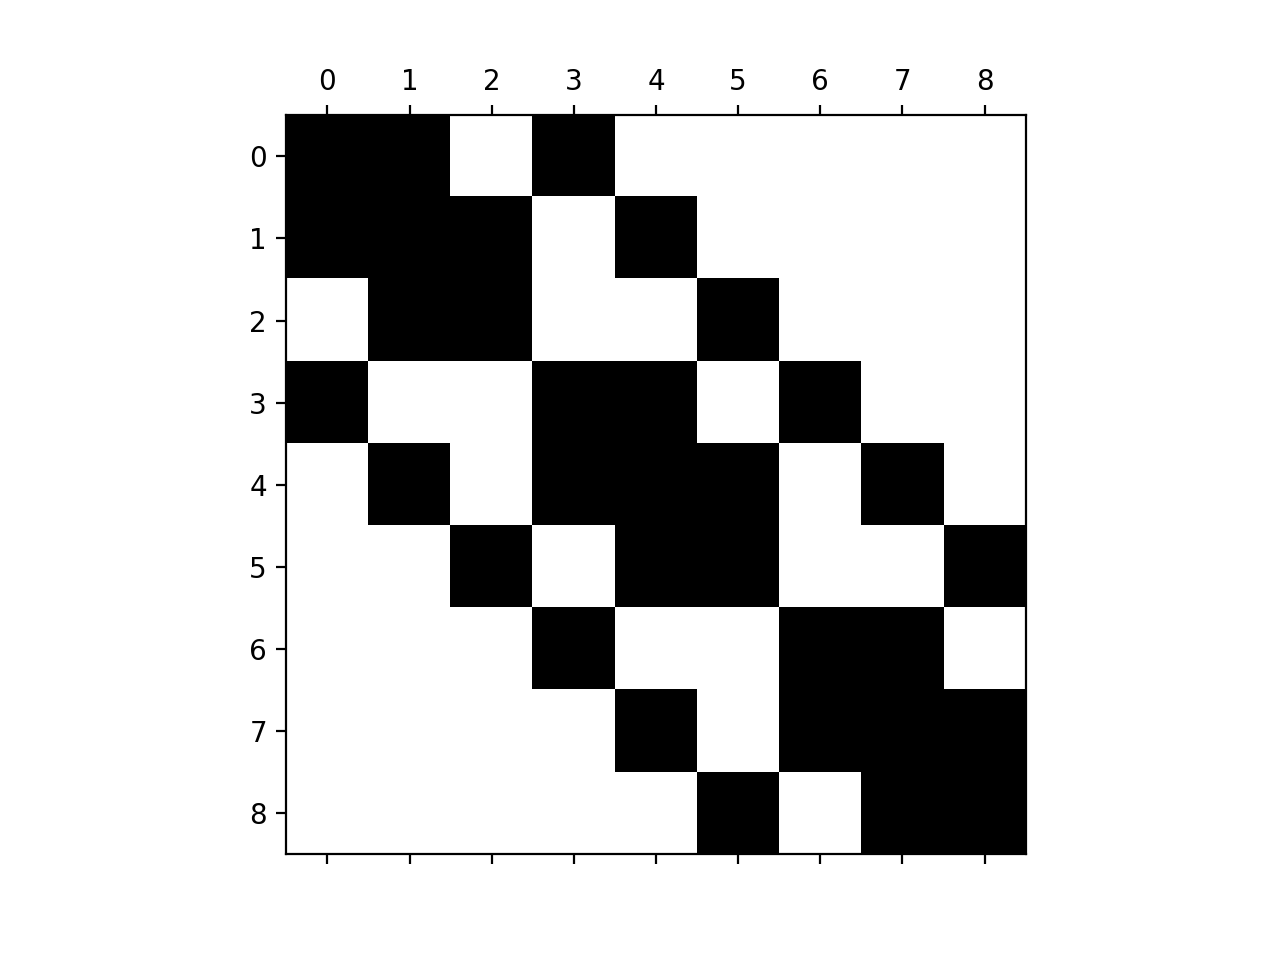

In [52]:
def assemble_matrix_A(dx, dy, N, M):
    T, D = generate_TD(N, dx, dy)
    A = np.zeros([N*M, N*M])
    for j in range(M):
        A[j*N:(j+1)*N,j*N:(j+1)*N] += T
        if (j < M-1):
            A[j*N:(j+1)*N,(j+1)*N:(j+2)*N] += D
        if (j > 0):
            A[j*N:(j+1)*N,(j-1)*N:j*N] += D
    return A

N = 3
M = 3
dx = 1./(N+1)
dy = 1./(M+1)
T, D = generate_TD(N, dx, dy)
#print (T)
A = assemble_matrix_A(dx, dy, N, M)
#print (A)
plt.spy(A)
plt.show()

#### Assemble Vector $b$
- Most components of $b$ are zeros,
- If $v_\ell$ is next to a boundary or more, then $b_\ell$ must be modified to account for the boundary condition,
- In two dimension, only $2 N\times M - 2$ components of $b$ is affected by the boundary conditions.
- Left boundary $g_L$: $b_{j N} += \lambda^2 g_L(y_j)$ for $j = 0,\ldots,M-1$,
- Right boundary $g_R$: ...,
- Bottom boundary $g_B$: ...,
- Top boundary $g_T$: $b_{(M-1)*N + i} += g_T(x_i)$ for $i = 0, \ldots,N-1$. 

In [53]:
# Set boundary conditions
def gL(y):
    return 0.

def gR(y):
    return 0.

def gB(x):
    return 0.

def gT(x):
    return 1.
    #return x*(1-x)*(4./5-x)*np.exp(6*x)

In [54]:
def assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT):
    b = np.zeros(N*M)
    # Left BCs
    for j in range(M):
        b[(j-1)*N] += (dy/dx)**2*gL(y[j+1]) 
    
    # Right BCs
    # b +=
    
    # Bottom BCs
    # b +=
    
    # Top BCs:
    for i in range(N):
        b[(M-1)*N+i] += gT(x[i+1])
    return b

<IPython.core.display.Javascript object>


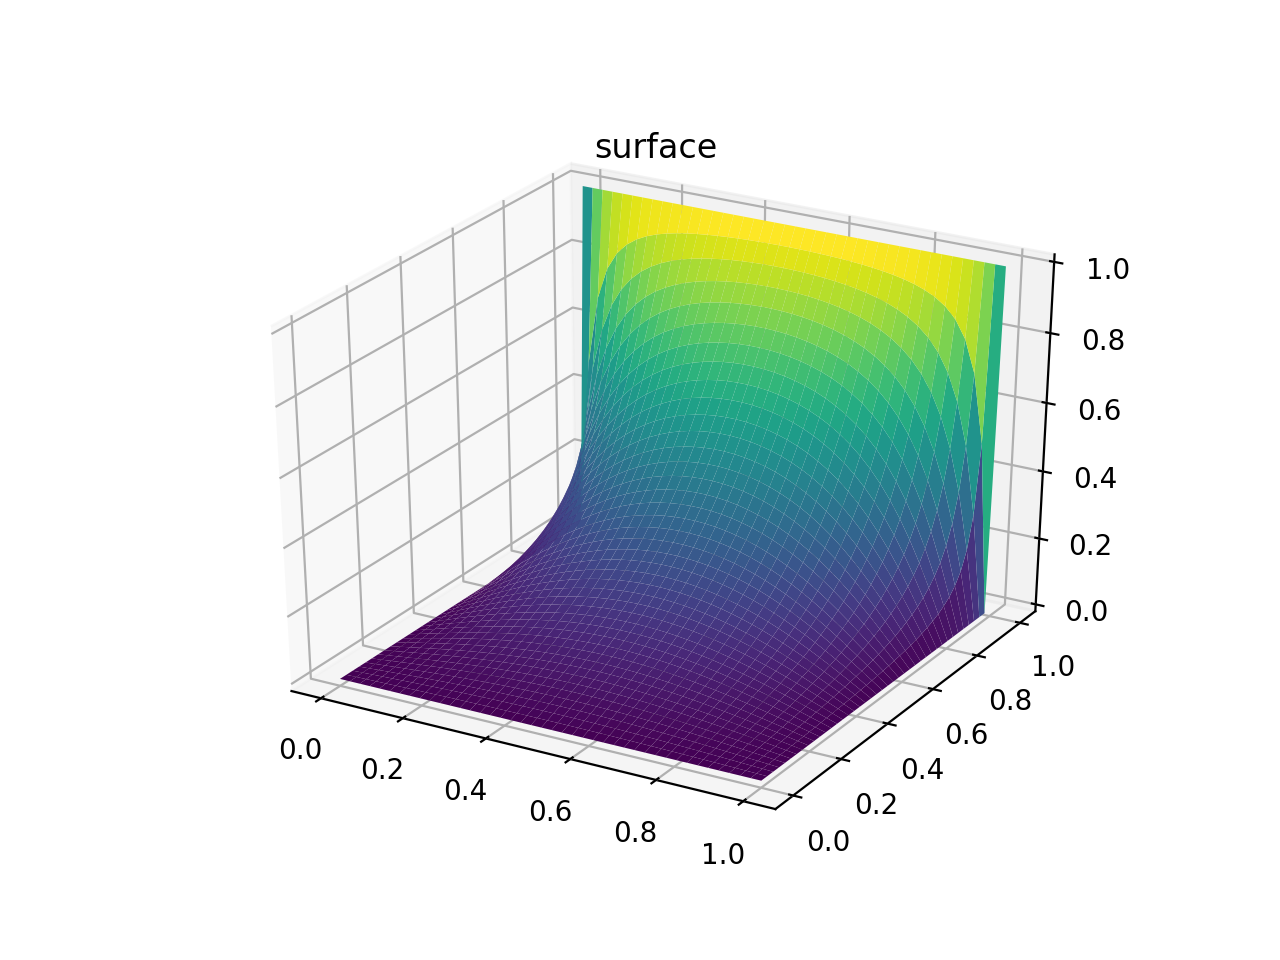

In [55]:
def Laplace_solver(a, b, N, M, gL, gR, gB, gT):
    dx = b/(M+1)
    dy = a/(N+1)
    x = np.linspace(0, a, N+2)
    y = np.linspace(0, b, M+2)
    
    A = assemble_matrix_A(dx, dy, N, M)
    b = assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT)
    
    v = np.linalg.solve(A,b)
    
    # add boundary points + plotting
    u = np.zeros([(N+2),(M+2)])
    #u[1:(N+1),1:(M+1)] = np.reshape(v, (N, M))
    # Top BCs
    for i in range(N+2):
        u[i,M+1] = gT(x[i])
    u = np.transpose(u)
    u[1:(M+1),1:(N+1)] = np.reshape(v, (M, N))

    
    X, Y = np.meshgrid(x, y)
    #Z = np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)

    fig = plt.figure()
    #ax = plt.axes(projection='3d')
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    ax.plot_surface(X, Y, u, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('surface')
    plt.show()
    
Laplace_solver(1, 1, 40, 40, gL, gR, gB, gT)

### Examples 

#### Examples 1
$$ 
    g_T(x) = \sin(\lambda_5 x),
$$
where $\lambda_n = \frac{n\pi}{a}$.  The exaction solution is 
$$
    u(x,y) = \frac{\sinh(\lambda_5 y)}{\sinh(\lambda_5 b)}\sin(\lambda_5 x).
$$
Here, we simply assume $a = b = 1$

<IPython.core.display.Javascript object>


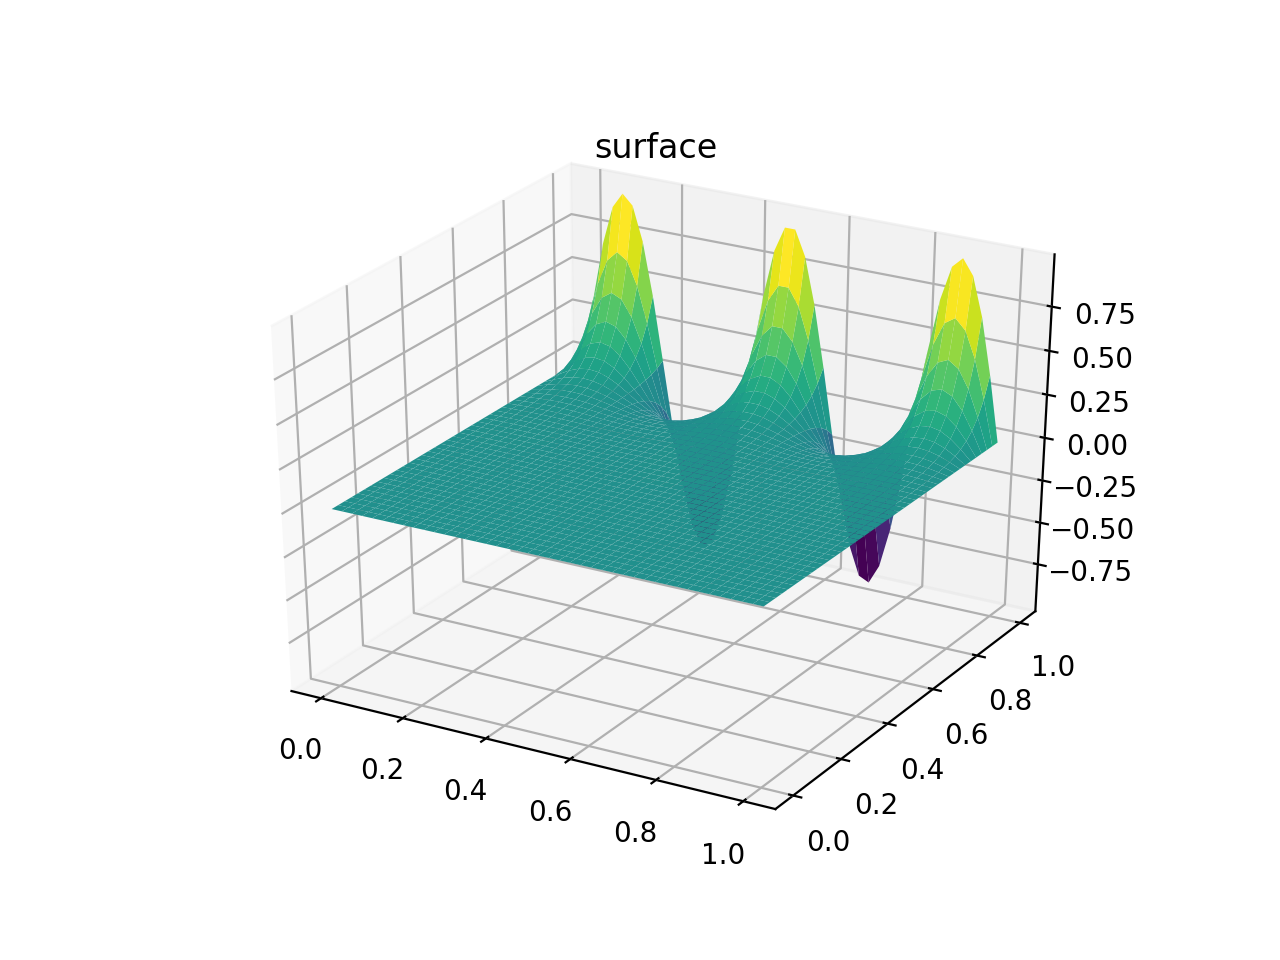

In [56]:
def gT_ex1(x):
    return np.sin(5*np.pi*x)

def u_ex1(x, y):
    return np.sinh(5*np.pi*y)/np.sinh(5*np.pi)*np.sin(5*np.pi*x)

Laplace_solver(1, 1, 40, 40, gL, gR, gB, gT_ex1)

#### Examples 2
$$ 
    g_T(x) = x(1-x)(\frac{4}{5}-x)e^{6x}.
$$
The fourier coefficient of exaction solution is 
$$
    a_n = \frac{12\lambda_n(4\gamma_n(\lambda_n^2 - 36)(\lambda_n^2+6) - 672\lambda_n^2 - 5\lambda_n^4 - 26352)}{5\sinh(\lambda_n)(\lambda_n^2 + 36)^4}
$$
where $\gamma_n = (-1)^n e^6$.  Here, we simply assume $a = b = 1$

<IPython.core.display.Javascript object>


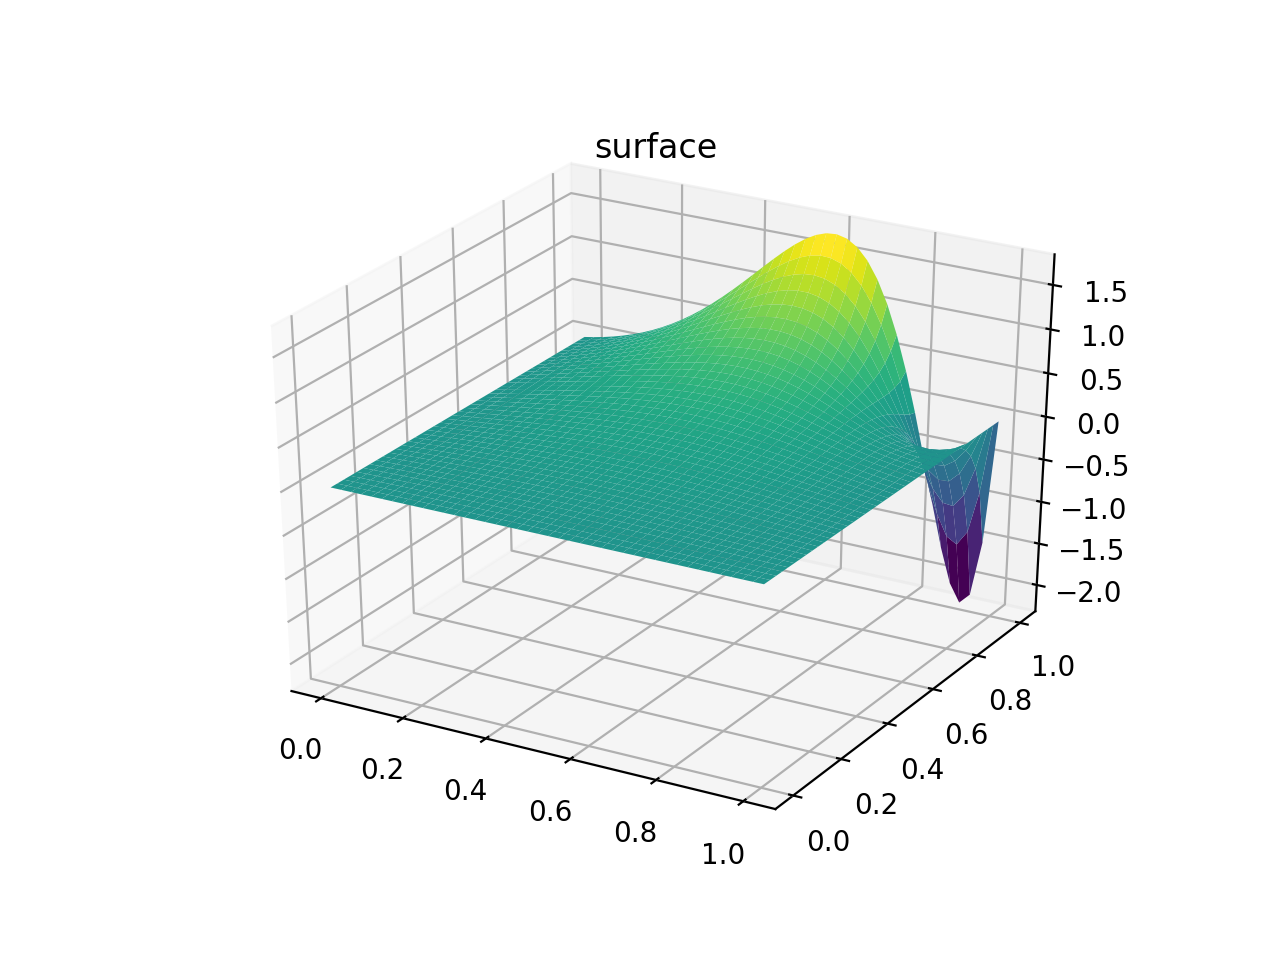

In [57]:
def gT_ex2(x):
    return x*(1-x)*(4./5-x)*np.exp(6*x)

#def u_ex2(x, y):
#    return np.sinh(5*np.pi*y)/np.sinh(5*np.pi)*np.sin(5*np.pi*x)

Laplace_solver(1, 1, 40, 40, gL, gR, gB, gT_ex2)

#### Examples 3
$$ 
    g_T(x) = \left\{\begin{array}{cl} 1 & \text{if } \frac{1}{4} \leq x \leq \frac{3}{4}, \\
                                      0 & \text{otherwise}\end{array}\right..
$$
Assuming $\frac{3}{4} < a$, the fourier coefficient of exaction solution is given as 
$$
    a_n = \frac{2}{a\lambda_n\sinh(\lambda_n b)}(\cos(\lambda_n/4) - \cos(3\lambda_n/4)),
$$
where $\lambda_n = \frac{n\pi}{a}$.  Here, we simply assume $a = b = 1$

<IPython.core.display.Javascript object>


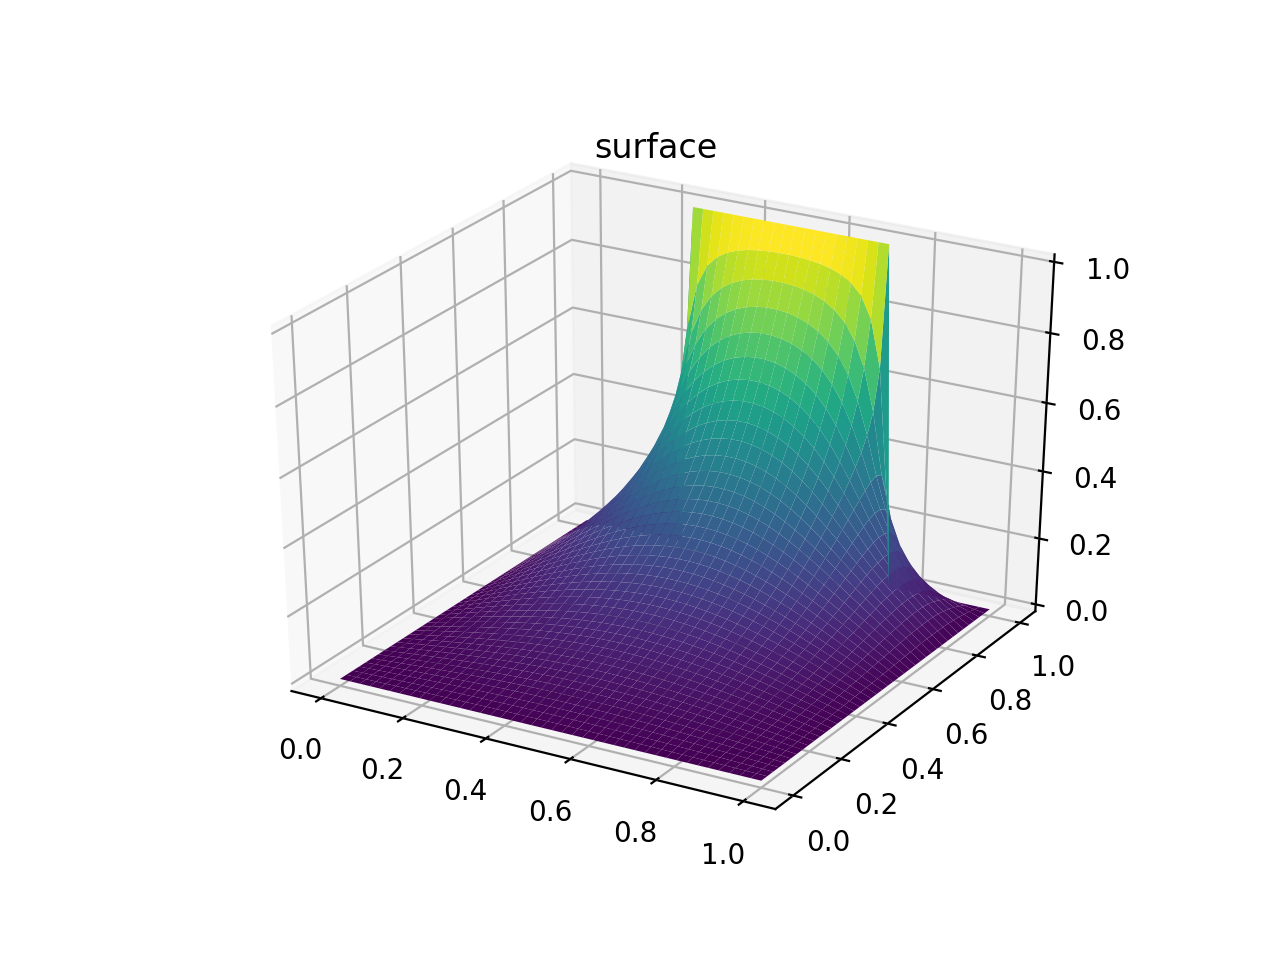

In [58]:
def gT_ex3(x):
    if (x >= 0.25 and x <= 0.75):
        return 1
    else:
        return 0

#def u_ex1(x, y):
#    return np.sinh(5*np.pi*y)/np.sinh(5*np.pi)*np.sin(5*np.pi*x)
Laplace_solver(1, 1,40, 40, gL, gR, gB, gT_ex3)

### How to Exam the Errors?

In [59]:
def gT_ex4(x):
    return np.sin(5*np.pi*x)

def u_ex4(x, y):
    return np.sinh(5*np.pi*y)/np.sinh(5*np.pi)*np.sin(5*np.pi*x)

def Laplace_error(a, b, N, M, gL, gR, gB, gT, u_exact):
    dx = b/(M+1)
    dy = a/(N+1)
    x = np.linspace(0, a, N+2)
    y = np.linspace(0, b, M+2)
    
    A = assemble_matrix_A(dx, dy, N, M)
    b = assemble_vector_b(x, y, dx, dy, N, M, gL, gR, gB, gT)
    
    v = np.linalg.solve(A,b)
    
    erri = 0.
    err = np.zeros([N,M])
    for i in range(N):
        for j in range(M):
            err[i,j] = np.abs(u_exact(x[i+1],y[j+1]) - v[j*N+i])
            erri = max(err[i,j], erri)    
    return erri
    
def Order_Verify(num, a, b, N0, M0, gL, gR, gB, gT, u_exact):
    erri = np.zeros(num)
    
    for i in range(num):
        erri[i] = Laplace_error(a, b, N0*2**i, M0*2**i, gL, gR, gB, gT, u_exact)
    
    print (" N    M  maximum error    order")
    for i in range(np.size(erri)):
        if (i == 0):
            print ("%-3d  %-3d  %9.2e        --" % (N0, M0, erri[i]))
        else:
            print ("%-3d  %-3d  %9.2e       %4.2f" % (N0*2**i, M0*2**i, erri[i], np.log(erri[i-1]/erri[i])/np.log(2)))
    
    
Order_Verify(4, 1, 1, 10, 10, gL, gR, gB, gT_ex4, u_ex4)

 N    M  maximum error    order
10   10    5.18e-02        --
20   20    1.57e-02       1.72
40   40    4.40e-03       1.83
80   80    1.15e-03       1.94
